Для начала скажу, что объяснять я буду случайный лес, тк он оказался наиболее оптимальным по времени и точности. Для объяснения я буду использовать
shap и AnchorTabular (при желании можно вместо него использовать LIME, конкретно в этом случае, эффект будет похожим).
Для начала я хочу посмотреть на графики решений, summary plot и bar plot влияния признаков на решения этой модели 

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 200/200 [01:26<00:00,  2.32it/s]


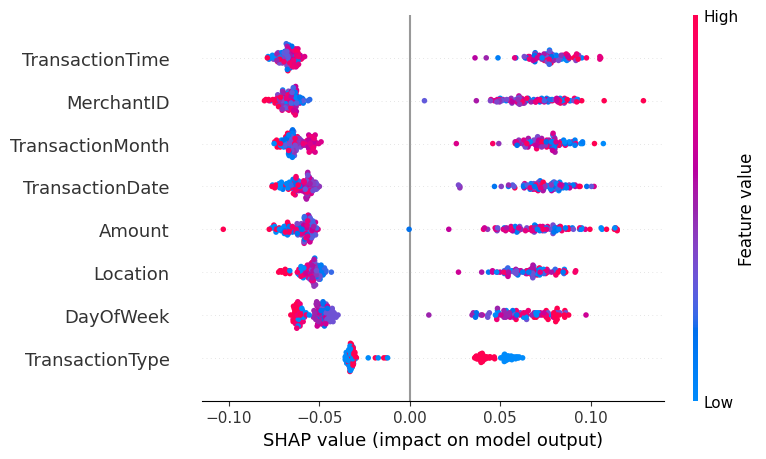

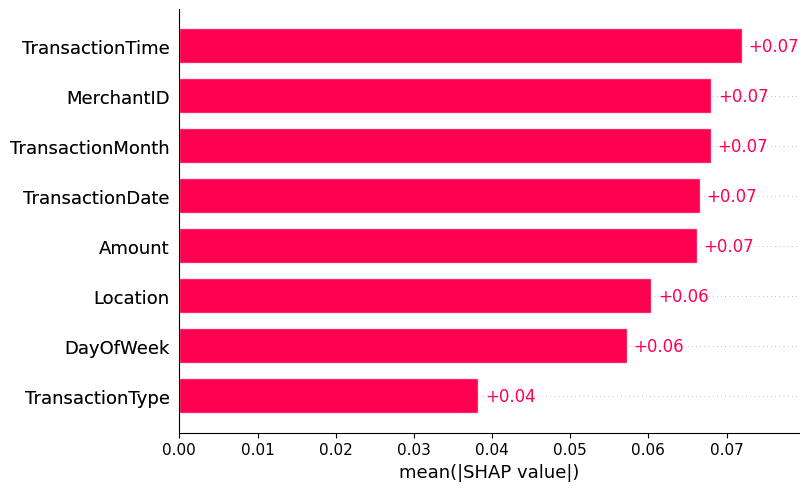

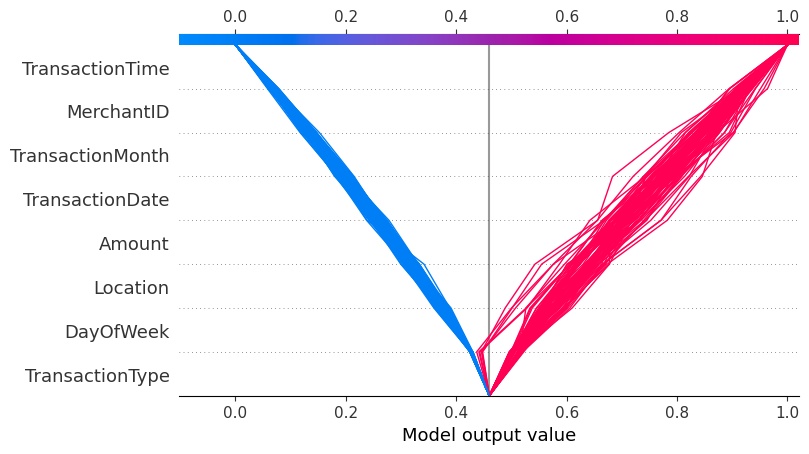

In [5]:
from scripts.model import Model, RandomForest, df
from scripts.XAI import Explanation

Explanation.buildExplanationPlot(model=RandomForest.learn(df=df), X_train=Model.createTest(df=df)[0],
                                 X_test=Model.createTest(df=df)[1], sampleSize=200)

# to see the code check files mentioned in imports

Итак, исходя из графиков видно, что для модели все данные имеют примерно равное значение, также можно сделать вывод, что в некоторых штатах уровень 
мошеннических операций выше, также как и в зависимости даты, также, чем больше сумма операции, тем выше вероятность мошенничества
Теперь сравним эти графики с графиком частоты появления каждого признака в объяснениях AchorTabular

100%|██████████| 200/200 [03:05<00:00,  1.08it/s]


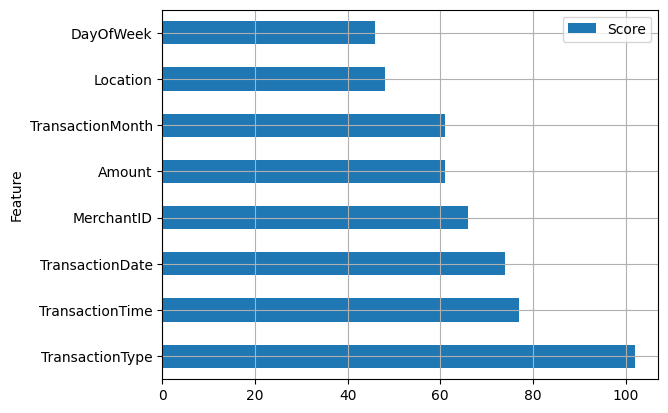

In [6]:
Explanation.buildAnchorTabular(model=RandomForest.learn(df=df), X_train=Model.createTest(df=df)[0],
                               X_test=Model.createTest(df=df)[1], slice=200)

Графики получились весьма разные, смотря на этот график, наименьшее значение имеет штат, хотя, исходя из первых графиков, его важность была
чуть ниже среднего (на фоне остальных признаков), но, тем не менее, он привносиь большое значение для итогового решения в модели, также это подтверждает
график частоты мошеннических операций в зависимости от местоположения, но с другой стороны получается, что самое большое значение для модели оказал признак 
типа операции (возврат/покупка), я думаю, что это могло произойти из-за того, что AnchorTabular просто подбирает такой набор значений, чтобы
максимизировать охват при ограничении точности, тогда как shap оценивает именно вклад в итоговый результат для самой модели, 
поэтому и могут быть такие различия в графиках
В конце можно подытожить, что хоть тип транзации и появлялся в интерпретациях AnchorTabular чаще всего, 
вклад в итоговые решения модели он оказал самый маленький, а признак места наоборот, хоть и встречался реже всего, но тем не менее, для модели значил
больше, чем тип транзакции (это же подтверждают графики из EDA). Но при всем при этом признак часа, в котором проводилась операция оказался на втором
месте по частоте встречаемости, тогда как в итоговое решение модели он оказал самое большое значение. Тоже самое применимо и для остальных признаков
также, для большинства признаков вклад примерно совпадает с графиками из EDA, так что эти показатели можно считать более-менее достоверными